[View in Colaboratory](https://colab.research.google.com/github/scumabo/DeepLearningFromScratch/blob/master/3_Softmax_regression.ipynb)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline


Saving MNIST_train.csv to MNIST_train.csv


In [2]:
data = pd.read_csv("MNIST_train.csv").values

X_data = data[:, 1:]
Y_data = data[:, [0]]

# Simple normalization
X_data = X_data / 255

X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, random_state = 0)

print("Number of training examples = " + str(X_train.shape[0]) )
print("Number of testing examples = " + str(X_test.shape[0]) )
print("Number of features = " +  str(X_train.shape[1]) )

Number of training examples = 31500
Number of testing examples = 10500
Number of features = 784


Text(0.5,1,'label is [5]')

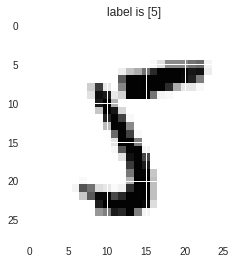

In [3]:
index = 10
sampleImg = np.reshape(X_train[index, :], [28, 28])

ax = plt.imshow(sampleImg)
plt.title("label is " + str(Y_train[index, :]))

Convert labels to its one-hot encoding for defining the loss function of softmax classification

In [0]:
def one_hot_matrix(Y, num_class):
    """
    Convert an array of Y to its one_hot_matrix
    
    Arguments:
    Y -- array (number of examples, 1)
    num_class -- num of classes
    
    Return:
    Y_one_hot -- (number of examples, num_class)
    """
    Y_one_hot = np.zeros((Y.shape[0], num_class))
    Y_one_hot[np.arange(Y.shape[0]), Y.T] = 1
    
    return Y_one_hot

In [5]:
Y_train_one_hot = one_hot_matrix(Y_train, 10)
Y_test_one_hot = one_hot_matrix(Y_test, 10)

index = 2
print("Letter " + str(Y_train[index, 0]) + " converted to " + str(Y_train_one_hot[index, :]))

Letter 9 converted to [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


## Math for one training example

###  1. Forward propagation

We treate the softmax classification problem as a 1-layer neural network with 10 nerons (add image). Each neural is just a linear combination of all input features, and the softmax activation function takes effect for all neurons.

For one example $\{x_1, ..., x_{n} \}$ (use column vectors in the following for legibility):

#### Linear forward

$$
Z
=
\begin{bmatrix} 
z_1 \\
\vdots \\
z_j \\
\vdots \\
z_{10} \\
\end{bmatrix}
=
\begin{bmatrix} 
\sum\limits_{i=1}^{n} w_{i, 1} x_{i} \\
\vdots \\
\sum\limits_{i=1}^{n} w_{i, j} x_{i} \\
\vdots \\
\sum\limits_{i=1}^{n} w_{i, 10} x_{i} \\
\end{bmatrix}
+
\begin{bmatrix} 
b_1 \\
\vdots \\
b_j \\
\vdots \\
b_{10} \\
\end{bmatrix}
$$

#### Softmax

$$
\begin{bmatrix} 
z_1 \\
\vdots \\
z_{10} \\
\end{bmatrix}
\Rightarrow 
\begin{bmatrix} 
\frac{e^{z_1} }{\sum\limits_{k = 1}^{10} e^{z_k} } \\
\vdots \\
\frac{e^{z_10} }{\sum\limits_{k = 1}^{10} e^{z_k} } \\
\end{bmatrix}=
\begin{bmatrix} 
a_1 \\
\vdots \\
a_{10} \\
\end{bmatrix}=
a
$$


### 2. Cross entropy loss

$$ \mathcal{L}(a, y) = -\sum\limits_{j = 1} ^{10} y_{j} \log a_{j} $$

### 3. Backward propagation

#### 1. Derivative of linear function

$$ \frac{\partial z_j }{\partial w_{i, j}} =  x_i $$

$$ \frac{\partial z_j }{\partial b_{j}} =  1 $$


#### 2. Derivative of the softmax function

Let $\Omega =  \sum\limits_{k = 1}^{10} e^{z_k}$, let compute the partial derivatives for the Jacobian matrix (10 x 10) $\frac{\partial a_p}{\partial z_q}$:

$$
\begin{split}
\text{if} \; p = q :& \frac{\partial a_p}{\partial z_p} = \frac{\partial \frac{e^{z_p}}{\Omega}}{\partial z_p} = \frac{e^{z_p}\Omega - e^{z_p}e^{z_p}}{\Omega^2} = \frac{e^{z_p}}{\Omega}\frac{\Omega - e^{z_p}}{\Omega} = \frac{e^{z_p}}{\Omega}(1-\frac{e^{z_p}}{\Omega}) =  y_p (1 - y_p)\\
\text{if} \; p \neq q :& \frac{\partial y_p}{\partial z_q} = \frac{\partial \frac{e^{z_p}}{\Omega}}{\partial z_q} = \frac{0 - e^{z_p}e^{z_q}}{\Omega^2} = -\frac{e^{z_p}}{\Omega} \frac{e^{z_1}}{\Omega} = -y_p y_q
\end{split}
$$

#### 3. Derivative of the cross entropy loss for the softmax function
$$\begin{split}
\frac{\partial \mathcal{L}}{\partial z_i} & = - \sum_{j=1}^{10} \frac{\partial y_j log(a_j)}{\partial z_i}{} =
- \sum_{j=1}^{10} y_j \frac{\partial log(a_j)}{\partial z_i} = - \sum_{j=1}^{10} y_j \frac{1}{a_j} \frac{\partial a_j}{\partial z_i} \\
& = - \frac{y_i}{a_i} \frac{\partial a_i}{\partial z_i} - \sum_{j \neq i}^{10} \frac{y_j}{a_j} \frac{\partial a_j}{\partial z_i}
= - \frac{y_i}{a_i} a_i (1-a_i) - \sum_{j \neq i}^{10} \frac{y_j}{a_j} (-a_j a_i) \\
& = - y_i + y_i a_i + \sum_{j \neq i}^{10} y_j a_i = - y_i + \sum_{j = 1}^{10} y_j a_i
= -y_i + a_i \sum_{j = 1}^{10} y_j \\
& = a_i - y_i
\end{split}$$

#### 3. Derivative of the cross entropy loss for $w$ and $b$

$$\frac{\partial \mathcal{L} }{\partial w_{i, j}} = \frac{\partial \mathcal{L}}{\partial z_j} \frac{\partial z_j }{\partial w_{i, j}} = (a_j - y_j) x_i $$

$$\frac{\partial \mathcal{L} }{\partial b_{j}} = \frac{\partial \mathcal{L}}{\partial z_j} \frac{\partial z_j }{\partial b_{j}} = a_j - y_j $$

## Vectorization for m training examples 


### 1. Forward propagation

let's use the convention that the data matrix $X$ with shape $m \times n$ has $m$ training examples and $n$ features for each example:

$$
X_{(m, n)}=
\begin{bmatrix} 
\dots x^{(1)} \dots \\
\vdots \\
\dots x^{(m)} \dots \\
\end{bmatrix}
$$

$$W_{(n, 10)}=
\begin{bmatrix} 
\vdots \dots \vdots \\w^{(1)} \dots w^{(10)} \\ \vdots \dots \vdots \\
\end{bmatrix}$$

$$Z_{(m, 10)} = X W$$

$$A_{(m, 10)} = \text{softmax}(Z_{(m, 10)})$$

Also, we have $Y_{(m, 10)}$, then the cross entropy loss is:
$$J = - \frac{1}{m} || Y * \log A ||_{F} = - \frac{1}{m} \sum\limits_{i=1}^m \sum\limits_{j=1}^{10} Y_{i,j} \log A_{i,j}$$

### 2. Backward propagation
$$dZ = Y - A$$
$$dW = \frac{1}{m} X^T (Y - A)$$
$$db = \frac{1}{m} (Y - A).sum(axis = 0)$$

In [0]:
def linear_forward(X, W, b):
    """
    Arguments:
    X -- data matrix (m, n)
    W -- weight matrix (n, num of class)
    b -- bias vector (1, num of class)
    
    Return: 
    Z -- input of activation function (m, 10)
    """
    
    Z = np.dot(X, W) + b
    
    
    
    assert(Z.shape == (X.shape[0], W.shape[1]) )
    
    return Z

In [0]:
def soft_max(Z):
    """
    Arguments:
    Z -- (m, num of class)
    
    Return:
    A -- softmax matrix (m, num of class) 
    """
    exp_Z = np.exp(Z)
    A = exp_Z / exp_Z.sum(axis = 1, keepdims = True) # sum along columns
    
    assert(A.shape == Z.shape )
    
    return A

In [0]:
def initialize_parameters(n, num_class):
    """
    Return:
    W -- (n, num of class)
    b -- (1, num of class)
    """
    np.random.seed(1)
    W = np.random.randn(n, num_class) * 0.01
    b = np.zeros((1, num_class))
    
    return W, b

## 2. Compute the cost function
The cross entropy loss function for one example is $\mathcal{L}(a, y) = -\sum\limits_{j = 1}^{10} a_{j} \log y_{j}$. The overall loss is just the average of $\mathcal{L}$ over all training examples: $$ J = \frac{1}{m} \sum\limits_{i = 1}^{m} \mathcal{L}(a^{(i)}, y^{(i)}) $$

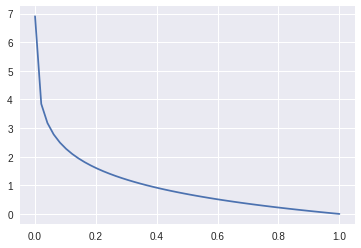

In [9]:
x = np.linspace(0.001, 1)
y = - np.log(x)
plt.plot(x, y)

If $a_j = 1$, the cost function want $y_j$ to be large while it heavily penalizes small $y_j$. 

In [0]:
def compute_cross_entropy_loss(A, Y):
    """
    Arguments:
    A -- prediction matrix of shape   (num of examples, num of class)
    Y -- one-hot matrix of true class (num of examples, num of class)
    Return:
    lost (scalar)
    """
    m = A.shape[0]
    return -(Y * np.log(A)).sum() / m

In [0]:
def backward_propagation(X, A, Y):
    """
    Arguments:
    X -- data matrix shape:  (m, n)
    A -- output of softmax:  (m, 10)
    Y -- one-hot true labels:(m, 10)
    """
    m = X.shape[0]
    
    dZ = A - Y
    dW = 1/m * np.dot(X.T, dZ)
    db = 1/m * np.sum(dZ, axis = 0, keepdims = True)
    
    return dW, db

Now Let's verify the correctness of our backward propagation using gradient checking. The idea is to compare the analytical derivatives to the numerical derivatives using central difference. Let's just do this for weight matrix $W$

In [0]:
def gradient_check(W, dW, X, Y, epsilon = 1e-7):
    """
    Arguments:
    W --  current weight matrix (num of feature, 10)
    dW -- analytical derivative matrix (num of feature, 10)
    X --  data matrix (num of examples, num of feature)
    Y --  one-hot label (num of examples, 10)
    
    Return:
    difference
    """
    gradApprox = np.zeros((dW.shape[0], dW.shape[1]))
    for i in range(0, W.shape[0]):
        for j in range(0, W.shape[1]):
            W_plus = np.copy(W)
            W_minus = np.copy(W)
            
            W_plus[i, j] = W_plus[i, j] + epsilon
            W_minus[i, j] = W_minus[i, j] - epsilon
            
            Z_plus = linear_forward(X, W_plus, b)
            A_plus = soft_max(Z_plus)
            J_plus = compute_cross_entropy_loss(A_plus, Y)

            Z_minus = linear_forward(X, W_minus, b)
            A_minus = soft_max(Z_minus)
            J_minus = compute_cross_entropy_loss(A_minus, Y)
            
            gradApprox[i, j] = (J_plus - J_minus) / (2*epsilon)
            
    # Compare gradients
    numerator = np.linalg.norm(gradApprox - dW)
    denominator = np.linalg.norm(dW) + np.linalg.norm(gradApprox)
    difference = numerator / denominator
    
    if difference > 3e-7:
        print ("\033[93m" + "There is a mistake in the backward propagation! difference = " + str(difference) + "\033[0m")
    else:
        print ("\033[92m" + "Your backward propagation works perfectly fine! difference = " + str(difference) + "\033[0m")
    
    return difference

In [0]:
num_feature = X_train.shape[1]
num_class = 10

W, b = initialize_parameters(num_feature, num_class)
Z = linear_forward(X_train, W, b)
A = soft_max(Z)
dW, db = backward_propagation(X_train, A, Y_train_one_hot)

#gradient_check(W, dW, X_train, Y_train_one_hot, epsilon = 1e-7)

In [0]:
def mclr_model(X, Y, num_iterations = 10000, learning_rate = 1.0, print_cost = False):
    """
    Arguments:
    X -- data matrix of shape:    (m, n)
    Y -- one-hot labels of shape: (m, num of class)
    
    Return:
    W, b -- parameters of the model
    """
    
    num_feature = X.shape[1]
    num_class = 10
    costs = []
    
    W, b = initialize_parameters(num_feature, num_class)
    
    
    # loop gradient decent
    for i in range(0, num_iterations):
        Z = linear_forward(X, W, b)
        A = soft_max(Z)
        
        cost = compute_cross_entropy_loss(A, Y)
        
        dW, db = backward_propagation(X, A, Y)
        
        W = W - learning_rate * dW
        b = b - learning_rate * db
    
        if print_cost and i % 100 == 0:
            print("Cost after iteration %i: %f" % (i, cost))
        
        costs.append(cost)
        
    
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("learning rate = " + str(learning_rate))
    plt.show()
    
    return W, b

Cost after iteration 0: 2.329673
Cost after iteration 100: 0.344579
Cost after iteration 200: 0.309545
Cost after iteration 300: 0.293013
Cost after iteration 400: 0.282683
Cost after iteration 500: 0.275327
Cost after iteration 600: 0.269677
Cost after iteration 700: 0.265121
Cost after iteration 800: 0.261321
Cost after iteration 900: 0.258072


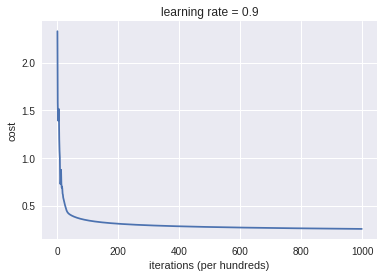

In [16]:
W, b = mclr_model(X_train, Y_train_one_hot, num_iterations = 1000, learning_rate = 0.9, print_cost = True)

In [0]:
def predict(W, b, X):
    """
    Arguments:
    W -- the learned weight matrix (num_feature, num_class)
    b -- the learned bias   matrix (1, num_class)
    X -- input data (m, num_feature)
    
    Return:
    prediction -- softmax vector (1, num_feature)
    """
    A = soft_max(linear_forward(X, W, b))
    
    prediction = np.argmax(A, axis = 1)
    
    return prediction

In [18]:
# Training accuracy
Y_train_hat = predict(W, b, X_train)

m = X_train.shape[0]
num_correct = m - np.count_nonzero((np.squeeze(Y_train) - Y_train_hat))

print("Training accuracy: %f" % float(num_correct / m * 100.0) + "%" )

Training accuracy: 92.758730%


In [20]:
# Testing accuracy
Y_test_hat = predict(W, b, X_test)

m = X_test.shape[0]
num_correct = m - np.count_nonzero((np.squeeze(Y_test) - Y_test_hat))

print("Testing accuracy: %f" % float(num_correct / m * 100.0) + "%")

Testing accuracy: 92.352381%
